In [62]:
#altering data frame
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

weather_df = pd.read_csv("weather.csv")
print(weather_df.head())
weather_df["Precipitation (inches)"] = weather_df["Precipitation (inches)"].replace("T", "0.0")
weather_df["Snow (inches)"] = weather_df["Snow (inches)"].replace("T", "0.0")
weather_df["Precipitation (inches)"] = pd.to_numeric(weather_df["Precipitation (inches)"])
weather_df["Snow (inches)"] = pd.to_numeric(weather_df["Snow (inches)"])
weather_df["Date"] = pd.to_datetime(weather_df["Date"])


         Date  Maximum Temperature degrees (F)  \
0  2020-01-01                             36.0   
1  2020-01-02                             37.0   
2  2020-01-03                             36.0   
3  2020-01-04                             30.0   
4  2020-01-05                             38.0   

   Minimum Temperature degrees (F) Precipitation (inches) Snow (inches)  \
0                             13.0                   0.00          0.00   
1                             31.0                   0.00          0.00   
2                             24.0                      T             T   
3                             24.0                   0.00          0.00   
4                             24.0                   0.01             T   

  Snow Depth (inches)  
0                5.00  
1                5.00  
2                4.00  
3                4.00  
4                4.00  


(0.0, 11.55)

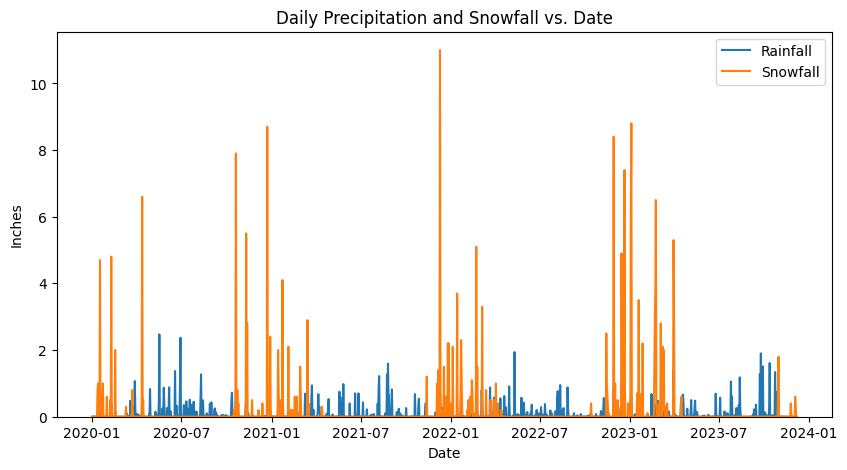

In [96]:

#different types of precipitation vs. date
fig, ax = plt.subplots(figsize = (10,5))
ax.plot(weather_df["Date"], weather_df["Precipitation (inches)"], label = "Rainfall")
ax.plot(weather_df["Date"], weather_df["Snow (inches)"], label = "Snowfall")
plt.title("Daily Precipitation and Snowfall vs. Date")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend()
ax.set_ylim(bottom =0)


[8.7, 11.0, 8.4, 8.8]


Text(0, 0.5, 'Inches')

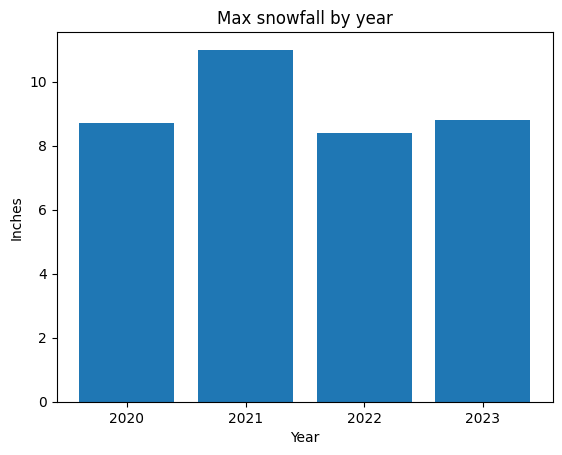

In [64]:
#max snowfall by year 
df_snow = weather_df[weather_df["Snow (inches)"] > 0]
max_annual_snow = [df_snow[df_snow["Date"].dt.year == i]["Snow (inches)"].max() for i in range (2020, 2024)]
print(max_annual_snow)
plt.bar([str(year) for year in range(2020,2024)], max_annual_snow, label = range(2020,2024))
plt.title ("Max snowfall by year")
plt.xlabel("Year")
plt.ylabel("Inches")

Text(0, 0.5, 'Inches')

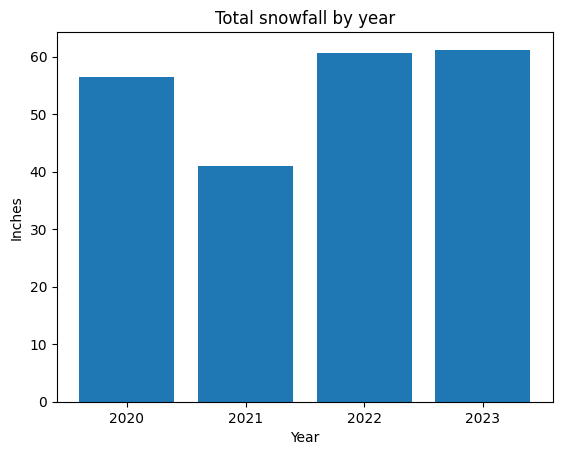

In [65]:
#total rainfall by year -- not done
#total_annual_rain = [df_rain[df_rain["Date"].dt.year == i]["Precipitation (inches)"].max() for i in range (2020, 2024)]
total_annual_snow = df_snow.groupby(df_snow["Date"].dt.year)["Snow (inches)"].sum()
yrs = [str(year) for year in range(2020,2024)]
plt.bar(yrs, total_annual_snow, label = range(2020,2024))
plt.title ("Total snowfall by year")
plt.xlabel("Year")
plt.ylabel("Inches")

Text(0, 0.5, 'Inches')

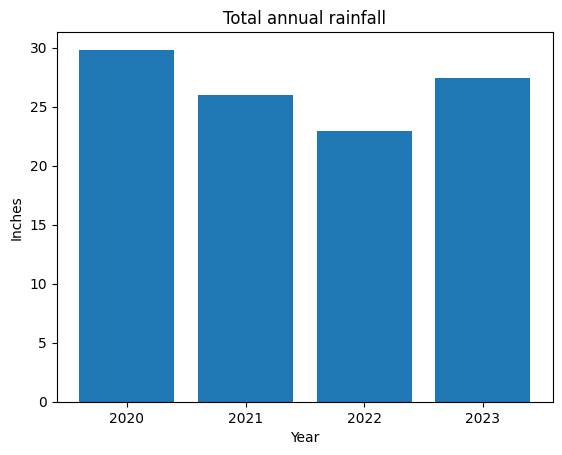

In [66]:
#total annual rainfall
df_rain = weather_df[weather_df["Precipitation (inches)"] > 0]
#total_annual_rain = [df_rain[df_rain["Date"].dt.year == i]["Precipitation (inches)"].max() for i in range (2020, 2024)]
total_annual_rain = df_rain.groupby(df_rain["Date"].dt.year)["Precipitation (inches)"].sum()
plt.bar(yrs, total_annual_rain, label = range(2020,2024))
plt.title ("Total annual rainfall")
plt.xlabel("Year")
plt.ylabel("Inches")

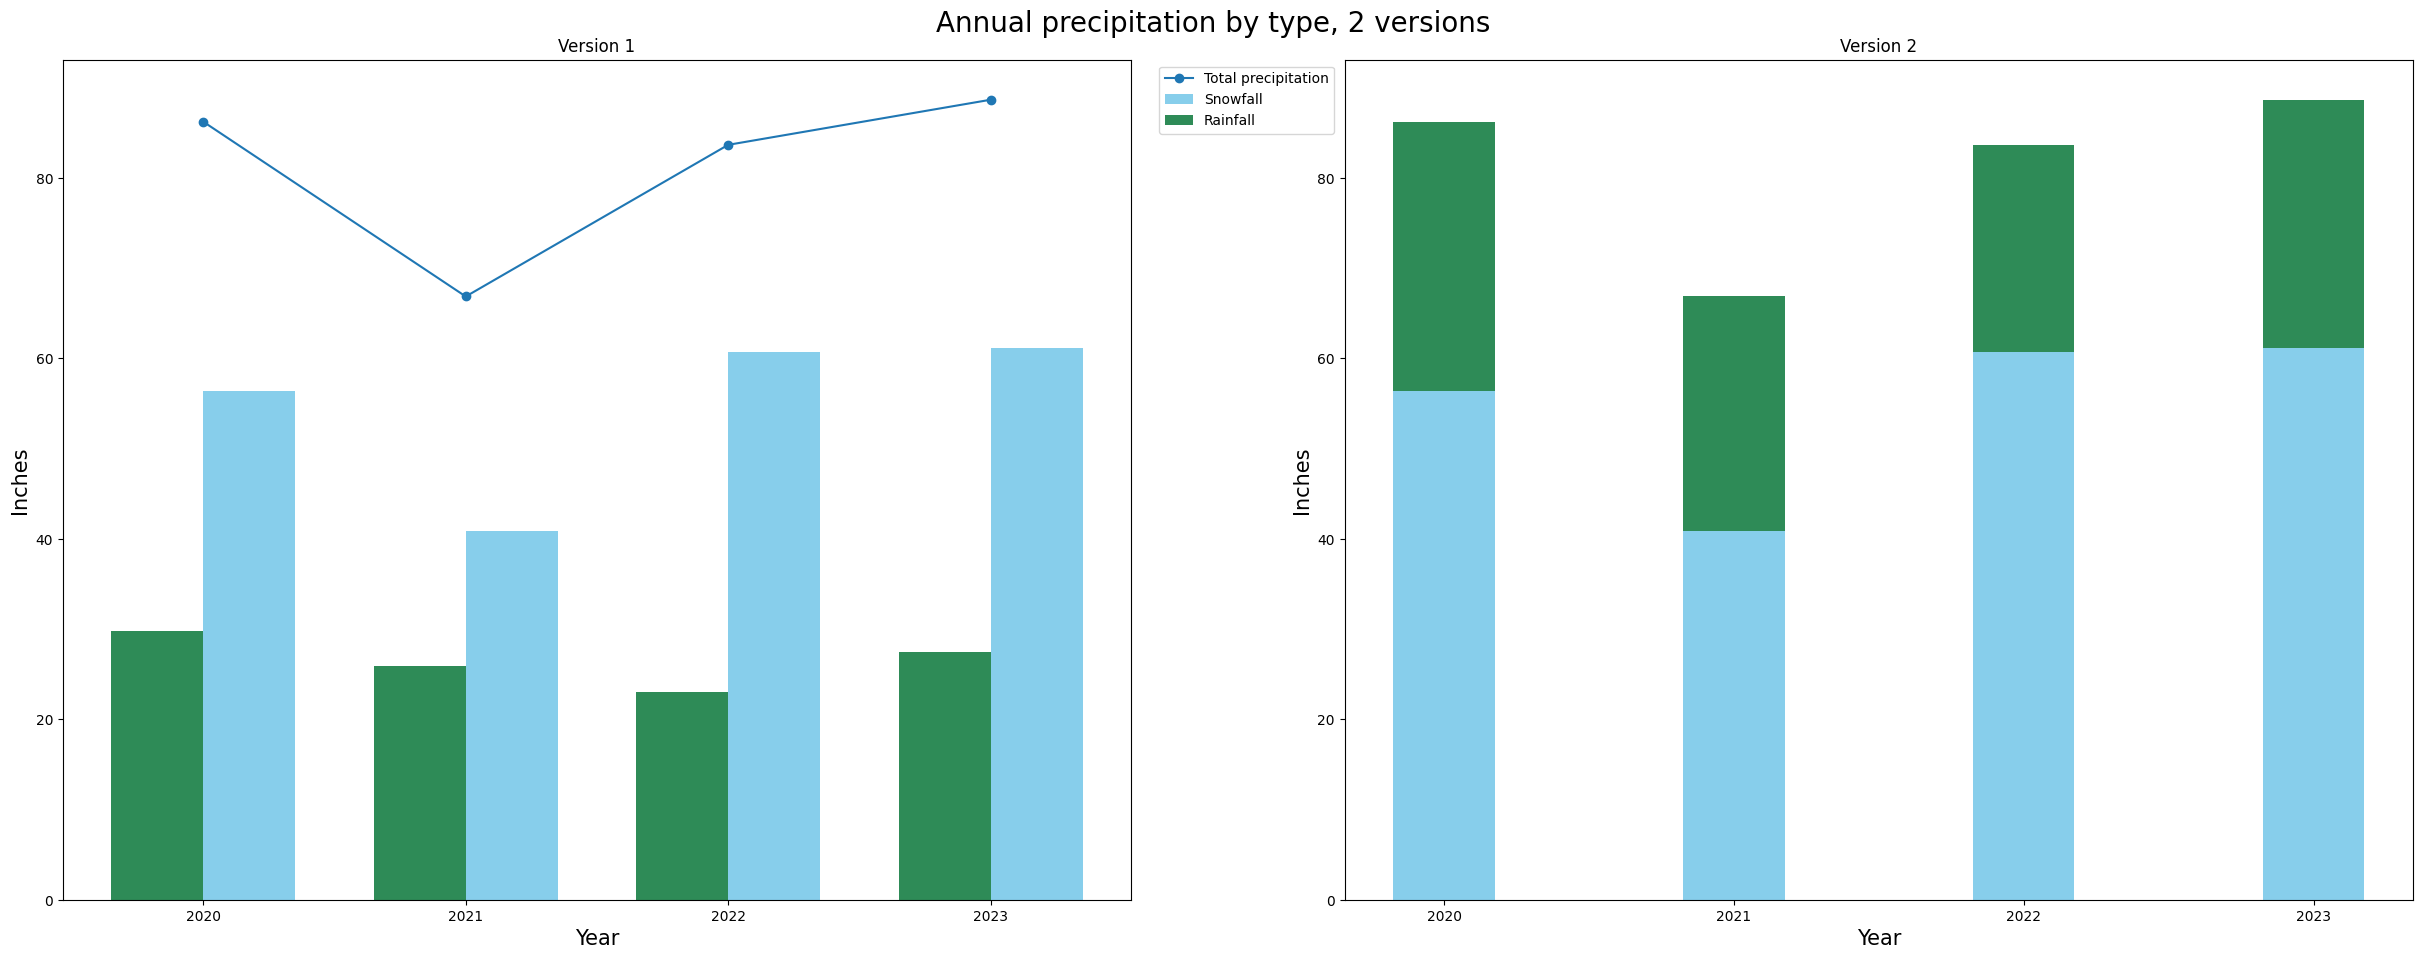

In [155]:
#total annual precipitation by type
total_precip = total_annual_rain + total_annual_snow
fig, ax = plt.subplots(1, 2, figsize = (20, 10))
x = np.arange(len(yrs)) #use to space the bars apart
bar_width = 0.35
ax[0].bar(x + bar_width/2, total_annual_snow, width = bar_width, label = "Snowfall", color = 'skyblue')
ax[0].bar(x-bar_width/2, total_annual_rain, width = bar_width, label = "Rainfall", color = 'seagreen')
ax[0].plot(yrs, total_precip, marker='o', label="Total precipitation")
ax[0].set_title("Version 1")
ax[0].set_xlabel("Year", fontsize = 15)
ax[0].set_ylabel("Inches", fontsize = 15)
plt.xticks(x, yrs) #replace x ticks with correct labels
ax[0].legend(bbox_to_anchor = (1.02, 1), loc = 'upper left')

ax[1].bar(yrs, total_annual_snow, width = bar_width, label = "Snowfall", color = 'skyblue')
ax[1].bar(yrs, total_annual_rain, width = bar_width, label = "Rainfall", color = 'seagreen', bottom = total_annual_snow)
ax[1].set_xlabel("Year",fontsize = 15)
ax[1].set_ylabel("Inches", fontsize = 15)
ax[1].set_title("Version 2")


fig.subplots_adjust(top = 0.95, right = 1.3)
fig.suptitle("Annual precipitation by type, 2 versions", x = 0.7, y = 1, fontsize = 20)
plt.show()

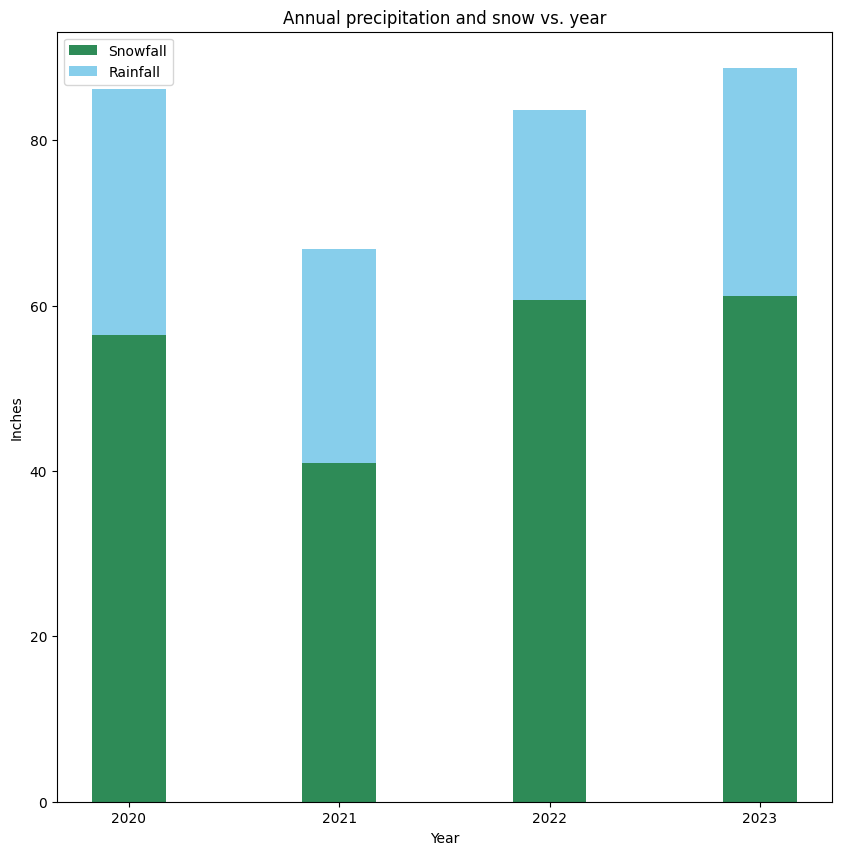

In [104]:
fig, ax = plt.subplots(figsize = (10,10))
x = np.arange(len(yrs)) #use to space the bars apart


ax.bar(yrs, total_annual_snow, width = bar_width, label = "Snowfall", color = 'seagreen')
ax.bar(yrs, total_annual_rain, width = bar_width, label = "Rainfall", color = 'skyblue', bottom = total_annual_snow)
plt.title("Annual precipitation and snow vs. year")
plt.xlabel("Year")
plt.ylabel("Inches")
plt.legend()
plt.show()

In [ ]:
# Challenge - using list comprehensions, or another method get the maximum temperature of every month in 2022
df2022 = weather_df[weather_df["Date"].dt.year == 2022]
#max_monthly_temps = [max(["Maximum Temperature degrees (F)"])]
max_temperatures = [df2022[df2022["Date"].dt.month == i]["Maximum Temperature degrees (F)"].max() for i in range(1, 13)]
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep","Oct", "Nov", "Dec"]
print(max_temperatures)

[42.0, 44.0, 65.0, 74.0, 92.0, 101.0, 95.0, 95.0, 92.0, 80.0, 76.0, 39.0]


Text(0, 0.5, 'Inches')

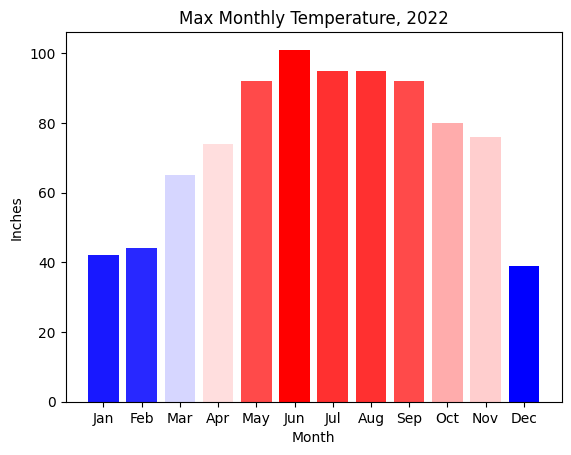

In [83]:
cm = plt.get_cmap('bwr')
print (cm)
normalize = plt.Normalize(min(max_temperatures), max(max_temperatures))
fig, ax = plt.subplots()
for month, temp in zip(months, max_temperatures): #plot each bar as gradient 
    color = cm(normalize(temp))
    ax.bar(month, temp, color=color)

# plt.bar(months, max_temperatures)
plt.title ("Max Monthly Temperature, 2022")
plt.xlabel("Month")
plt.ylabel("Inches")
